In [5]:
import torch
from diffusers import StableDiffusionPipeline
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
ldm_stable = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)
tokenizer = ldm_stable.tokenizer

In [6]:
import control
import importlib
importlib.reload(control)
from control import *

  0%|          | 0/51 [00:00<?, ?it/s]

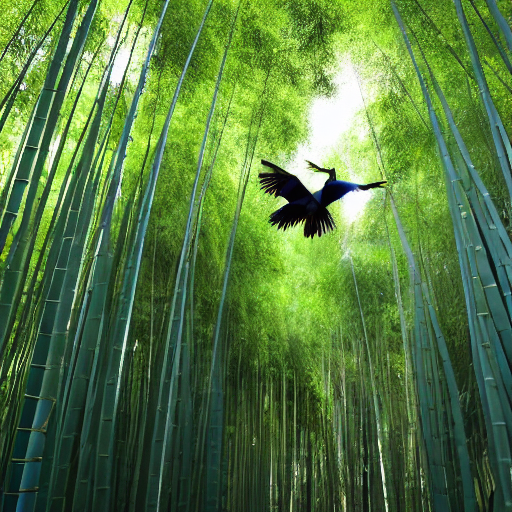

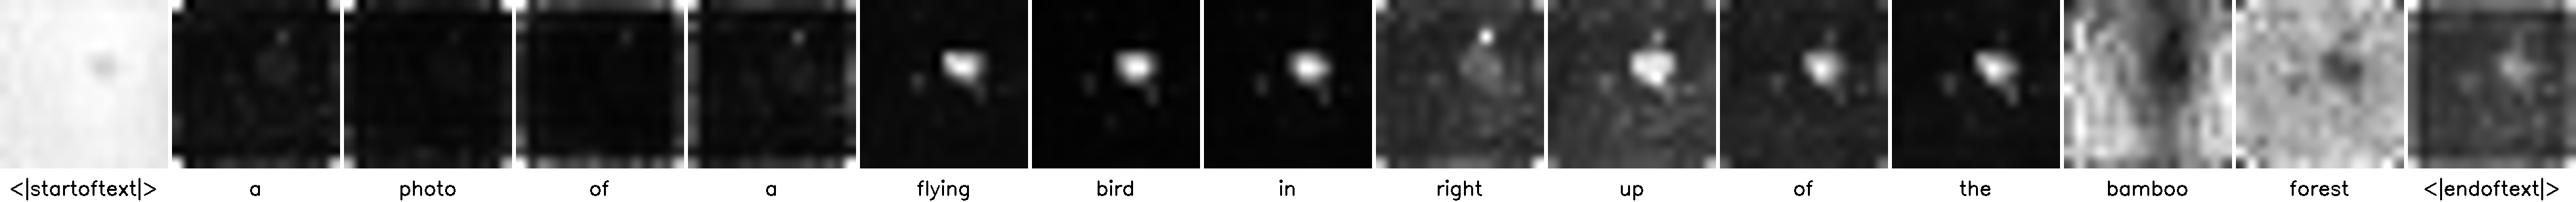

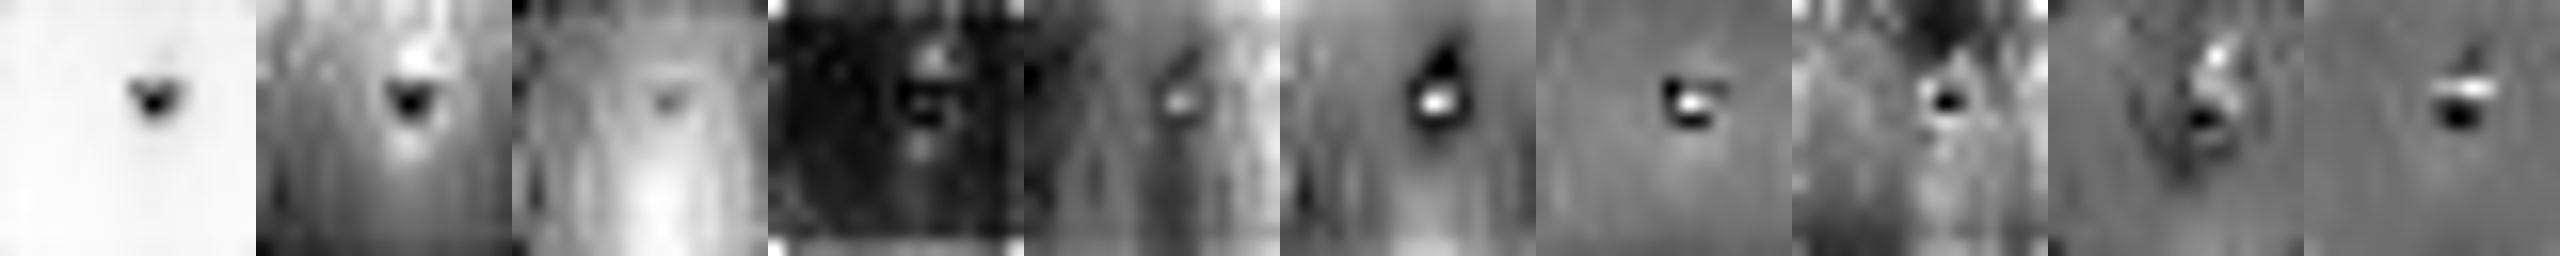

In [7]:
g_cpu = torch.Generator().manual_seed(47)
prompts = ["a photo of a flying bird in right up of the bamboo forest"]
controller = AttentionStore()
image, x_t = run_and_display(ldm_stable, prompts, controller, latent=None, run_baseline=False, generator=g_cpu)
show_cross_attention(ldm_stable, prompts, controller, res=16, from_where=("up", "down"))
show_self_attention_comp(prompts, controller, res=16, from_where=("up", "down"))

  0%|          | 0/51 [00:00<?, ?it/s]

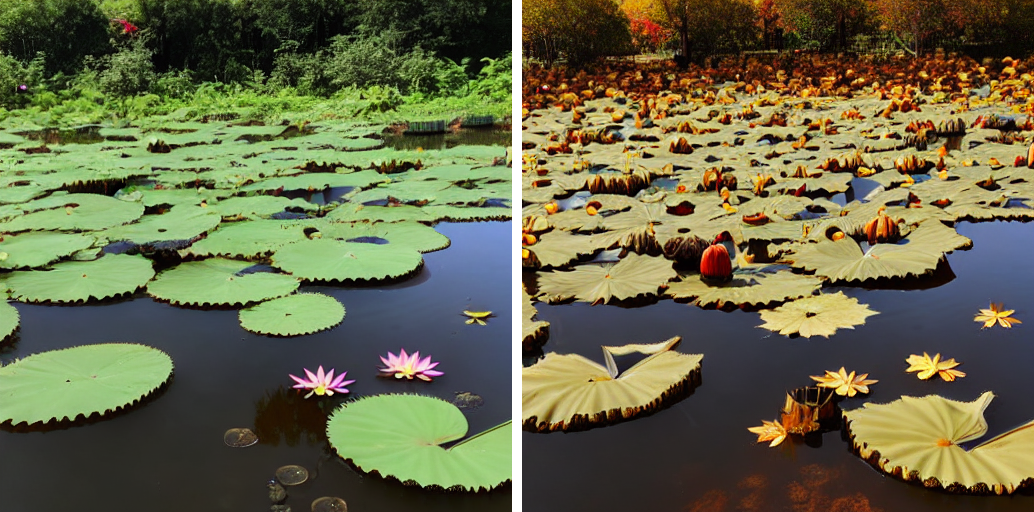

In [14]:
prompts = ["a photo of the nap in the lotus pond",
           "a photo of the nap in the lotus pond at autumn"]
lb = LocalBlend(prompts, (("tiger", "lion"),), ldm=ldm_stable)
controllera = AttentionRefine(prompts, NUM_DIFFUSION_STEPS, cross_replace_steps=0.8,
                             self_replace_steps=0.4,
                             local_blend=None, ldm=ldm_stable)
equalizer = get_equalizer(ldm_stable, prompts[1], ("autumn"), (2,))
controller = AttentionReweight(prompts, NUM_DIFFUSION_STEPS, cross_replace_steps=0.8,
                               self_replace_steps=.4, equalizer=equalizer, local_blend=None,
                               controller=controllera, ldm=ldm_stable)
_ = run_and_display(ldm_stable, prompts, controller, latent=x_t, run_baseline=False)